In [5]:
import pandas as pd
import numpy as np

In [6]:
titanic = pd.read_csv('Titanic_train.csv')

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# xem tên các cột
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# khả năng sông sót sống:1, die:0
titanic.describe() #xem thống kê

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# xem kiểu dl
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# 2.tiền xử lý các biến định danh
titanic.Embarked.unique() #xem thuộc tính

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
# chuyển đổi Embarked thành các biến giả
ports = pd.get_dummies(titanic.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [15]:
titanic = titanic.join(ports) #nối vào dataset
titanic.drop(['Embarked'], axis=1,inplace=True) #sau đó xóa cột cũ đi

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [17]:
# chuyển đổi biến giả Sex
titanic.Sex = titanic.Sex.map({'male':0, 'famale':1})

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [19]:
y = titanic.Survived.copy() #sao chép các giá trị cột y ra, biến mục tiêu
X = titanic.drop(['Survived'], axis=1) #sau đó xóa column y, X là biến độc lập 

In [20]:
X.drop(['Cabin'], axis=1, inplace=True) 
X.drop(['Ticket'], axis=1, inplace=True) 
X.drop(['Name'], axis=1, inplace=True) 
X.drop(['PassengerId'], axis=1, inplace=True) 

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         577 non-null    float64
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 44.5 KB


In [22]:
# kt xem có gt thiếu ko vì hồi quy có gt thiếu sẽ ko chạy đc
X.isnull().values.any()

True

In [23]:
#xem all các dong có NaN
X[pd.isnull(X).any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,1,NaN,38.0,1,0,71.2833,1,0,0
2,3,NaN,26.0,0,0,7.9250,0,0,1
3,1,NaN,35.0,1,0,53.1000,0,0,1
5,3,0.0,NaN,0,0,8.4583,0,1,0
8,3,NaN,27.0,0,2,11.1333,0,0,1
...,...,...,...,...,...,...,...,...,...
880,2,NaN,25.0,0,1,26.0000,0,0,1
882,3,NaN,22.0,0,0,10.5167,0,0,1
885,3,NaN,39.0,0,5,29.1250,0,1,0
887,1,NaN,19.0,0,0,30.0000,0,0,1


In [24]:
# điền NaN bằng TB của tuổi
X.Age.fillna(X.Age.mean(), inplace=True)

In [25]:
X.isnull().values.any()

True

In [26]:
X.Sex.fillna(X.Sex.mean(), inplace=True)

In [27]:
X.isnull().values.any()

False

In [28]:
#Split dataset to train and test
from sklearn.model_selection import train_test_split
# 80% go into the training, 20% in the validation test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

In [29]:
#3 sd LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

C:\Users\Thuong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
#4 đánh giá mô hình
model.score(X_train, y_train)

0.7176966292134831

In [32]:
model.score(X_valid, y_valid)

0.7262569832402235

In [33]:
model.intercept_ #hệ số chẵn all biến độc lập bằng 0

array([2.57533327])

In [34]:
model.coef_ #hs hồi quy

array([[-0.95361252,  0.        , -0.04011633, -0.2193966 ,  0.34074119,
         0.00216055,  0.52571115,  0.91460744, -0.02441547]])

In [35]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [36]:
# ct P(survive) = 1/(1+e^-logit)
# logit =B0+B1*x1+....Bn*xn
# logit = 2.57533327-0.95361252*Pclass-0.04011633*Sex-0.2193966*Age.....
import math
logit =1.4224-0.9319*1+2.83*-0.0393*55-0.393*1+0.0193*0+0.00190*50+0.744*1+0.4555*0+0.2228*0

P_survive=1/(1+math.exp(-logit))
P_survive
if P_survive >=0.5:
    print('Survived: Yes')
else:
    print('Survived: No')
    print(P_survive)

Survived: No
0.005593477014065224


<AxesSubplot:>

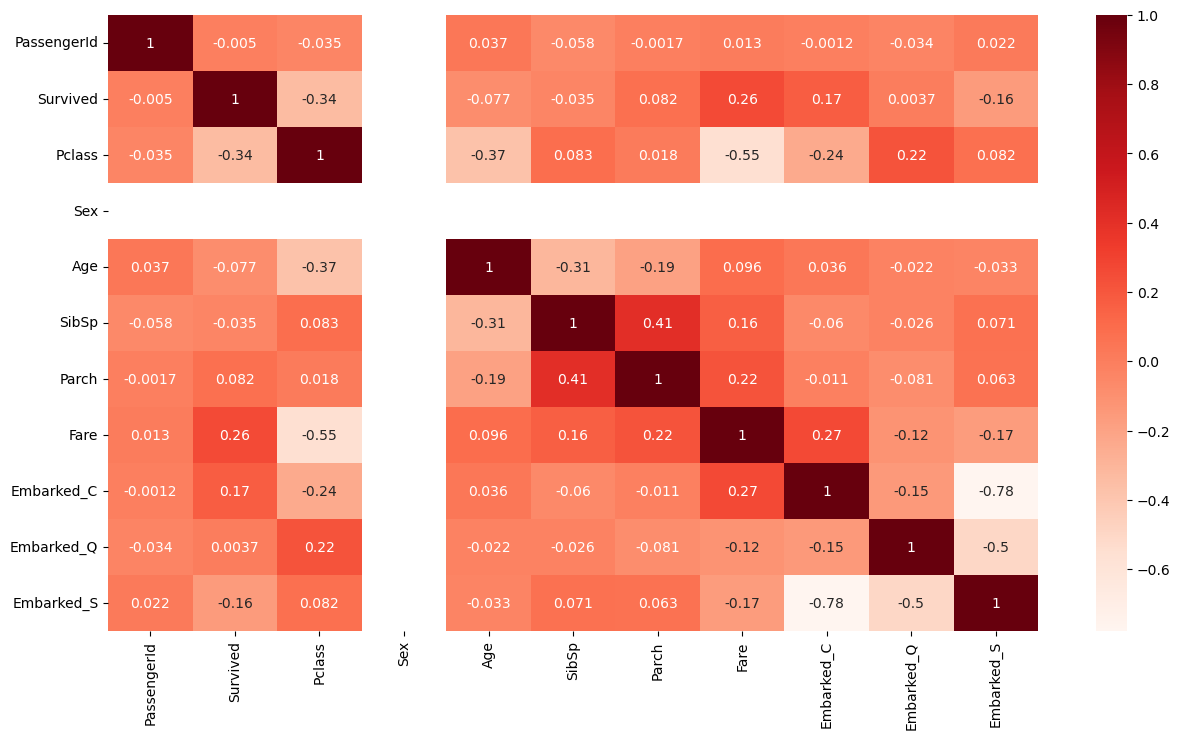

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(titanic.corr(), annot=True, cmap=plt.cm.Reds)